<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 63.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 11.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-linux_x86_64.whl size=300750 sha256=b4fc0e59bb1042c8ef6a754bc314b4aa62df7e3f5b1d6f101b45ec7711190453
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ff/6c/15/506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee


In [239]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [240]:
import pandas as pd
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
import yfinance as yf
ticker = yf.Ticker("TSLA")
ticker.info

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [24]:
import pandas as pd
tesla_data = pd.DataFrame()
tesla_data = ticker.history(period='max')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-31 00:00:00-05:00,423.790009,427.929993,402.540009,403.839996,76825100,0.0,0.0
2025-01-02 00:00:00-05:00,390.100006,392.730011,373.040009,379.279999,109710700,0.0,0.0
2025-01-03 00:00:00-05:00,381.480011,411.880005,379.450012,410.440002,95423300,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [26]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [ ]:
import requests
from bs4 import BeautifulSoup
url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
html_data

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [93]:
soup =BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [150]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url).text
sou = BeautifulSoup(response, 'html.parser')
table_body = sou.find_all("tbody")[1] 
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=['Date', 'Revenue'])], ignore_index=True)
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
...,...,...
367,2010-06-30,$28
368,2010-03-31,$21
369,2009-12-31,
370,2009-09-30,$46


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [151]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex= True)
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
...,...,...
367,2010-06-30,28
368,2010-03-31,21
369,2009-12-31,
370,2009-09-30,46


Execute the following lines to remove an null or empty strings in the Revenue column.


In [152]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
...,...,...
366,2010-09-30,31
367,2010-06-30,28
368,2010-03-31,21
370,2009-09-30,46


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [153]:
tesla_revenue.tail()

,Date,Revenue
366,2010-09-30,31
367,2010-06-30,28
368,2010-03-31,21
370,2009-09-30,46
371,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [130]:
import yfinance as yf
ticker = yf.Ticker("GME")
ticker.info

In [259]:
import pandas as pd
gme_data = pd.DataFrame(ticker.info)

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [252]:
gme_data.reset_index(inplace=True)
gme_data

,level_0,index,address1,city,state,zip,country,phone,website,industry,...,returnOnAssets,returnOnEquity,freeCashflow,operatingCashflow,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,0,0,625 Westport Parkway,Grapevine,TX,76051,United States,817 424 2000,https://www.gamestop.com,Specialty Retail,...,0.00043,0.01504,-93387504,-33100000,-0.314,0.26237,0.01037,-0.03558,USD,None
1,1,1,625 Westport Parkway,Grapevine,TX,76051,United States,817 424 2000,https://www.gamestop.com,Specialty Retail,...,0.00043,0.01504,-93387504,-33100000,-0.314,0.26237,0.01037,-0.03558,USD,None
2,2,2,625 Westport Parkway,Grapevine,TX,76051,United States,817 424 2000,https://www.gamestop.com,Specialty Retail,...,0.00043,0.01504,-93387504,-33100000,-0.314,0.26237,0.01037,-0.03558,USD,None


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [212]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url).text

In [ ]:
## Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [213]:
html = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [216]:
gme_revenue = pd.DataFrame()
table_body = html.find_all("tbody")[1] 
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=['Date', 'Revenue'])], ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex= True)
gme_revenue



,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [217]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [225]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 114.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 8.5 MB/s eta 0:00:00


AttributeError: 'America/New_York' object has no attribute 'update'

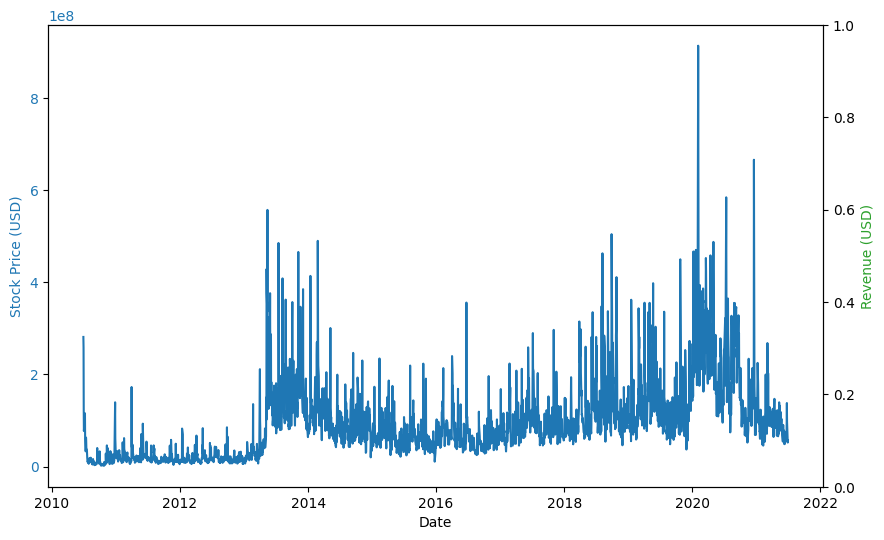

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
tesla_data_up_to_june = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue_up_to_june = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

def make_graph(tesla_data, tesla_revenue, Tesla):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting Tesla Stock Price
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.plot(tesla_data['Date'], tesla_data['Volume'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Creating a second y-axis to plot Revenue
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Revenue (USD)', color='tab:green')
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='tab:green', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Adding title and legends
    plt.title(title)
    fig.tight_layout()
    
    # Display the graph
    plt.show()

# Call the make_graph function to plot the graph
make_graph(tesla_data_up_to_june, tesla_revenue_up_to_june, 'Tesla Stock and Revenue Data (Up to June 2021)')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


KeyError: 'revenueGrowth'

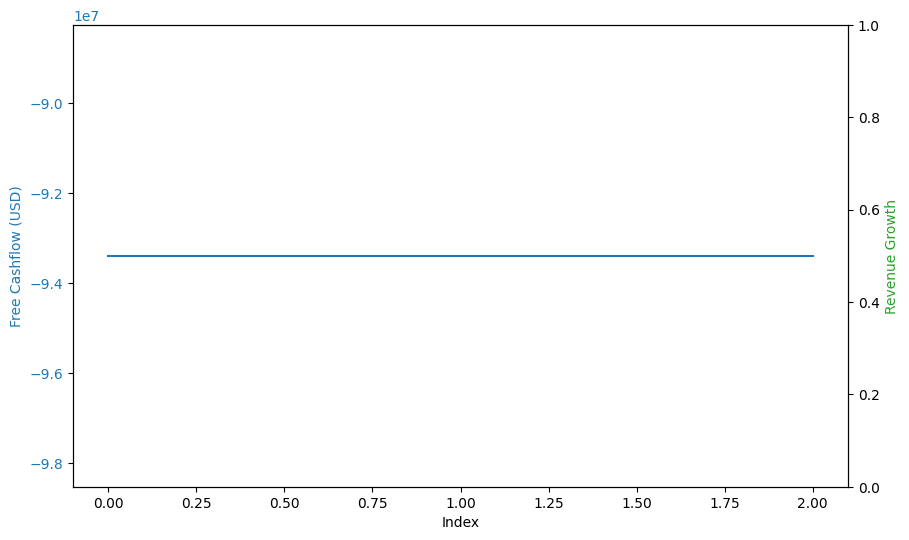

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with actual data)
# Assuming 'gme_data' and 'gme_revenue' are already loaded as dataframes.

# Check for column names and ensure 'revenueGrowth' and 'Revenue' columns exist


# Date filter for gme_revenue only (assuming 'Date' column exists in gme_revenue)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')  # Convert to datetime
gme_revenue_up_to_june = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Function to plot the graph
def make_graph(gme_data, gme_revenue, GameStop):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting a financial metric from gme_data (e.g., freeCashflow, replace 'freeCashflow' with the actual column)
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Free Cashflow (USD)', color='tab:blue')  # Change label based on the metric you want
    ax1.plot(gme_data.index, gme_data['freeCashflow'], color='tab:blue', label='Free Cashflow')  # Replace 'freeCashflow' with actual column name
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Creating a second y-axis to plot Revenue (after applying the date filter)
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Revenue Growth', color='tab:green')
    ax2.plot(gme_revenue_up_to_june['Date'], gme_revenue_up_to_june['revenueGrowth'], color='tab:green', label='Revenue Growth')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Adding title and legends
    plt.title(title)
    fig.tight_layout()
    
    # Display the graph
    plt.show()

# Call the make_graph function to plot the graph (with date filtering for gme_revenue)
make_graph(gme_data, gme_revenue_up_to_june, 'GameStop Stock and Revenue Data (Up to June 2021)')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
